In [238]:
from statsbombpy import sb
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from mplsoccer import  VerticalPitch, Pitch, FontManager, add_image
import numpy as np
from PIL import Image

from urllib.request import urlopen


In [239]:
sb.competitions()

C:\Users\CHUCHO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-05-21T03:36:44.090970,2024-05-21T03:38:27.534702,2024-05-21T03:38:27.534702,2024-05-21T03:36:44.090970
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-28T18:02:23.493027,None,None,2024-02-28T18:02:23.493027
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-05-13T13:14:25.239651,2021-06-13T16:17:31.694,None,2024-05-13T13:14:25.239651
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
67,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
68,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
69,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
70,72,107,International,Women's World Cup,female,False,True,2023,2024-04-05T13:22:08.250209,2024-04-05T13:29:51.562450,2024-04-05T13:29:51.562450,2024-04-05T13:22:08.250209


In [240]:
sb.matches(competition_id=43, season_id=106).sort_values('match_date')

C:\Users\CHUCHO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
35,3857286,2022-11-20,18:00:00.000,International - FIFA World Cup,2022,Qatar,Ecuador,0,2,available,available,2023-07-25T07:10:18.861818,2023-07-25T07:19:21.209321,1,Group Stage,Al Bayt Stadium,Daniele Orsato,Félix Sánchez Bas,Gustavo Julio Alfaro,1.1.0,2,2
57,3857271,2022-11-21,15:00:00.000,International - FIFA World Cup,2022,England,Iran,6,2,available,available,2023-06-07T18:13:08.086293,2023-06-18T15:37:14.539174,1,Group Stage,Sheikh Khalifa International Stadium,Raphael Claus,Gareth Southgate,Carlos Manuel Brito Leal Queiróz,1.1.0,2,2
46,3857285,2022-11-21,18:00:00.000,International - FIFA World Cup,2022,Senegal,Netherlands,0,2,available,available,2023-06-03T18:25:09.879323,2023-06-20T10:37:16.264240,1,Group Stage,Al Thumama Stadium,Wilton Pereira Sampaio,Aliou Cissé,Louis van Gaal,1.1.0,2,2
34,3857282,2022-11-21,21:00:00.000,International - FIFA World Cup,2022,United States,Wales,1,1,available,available,2023-07-25T08:22:55.740949,2023-07-25T09:10:59.976019,1,Group Stage,Ahmad bin Ali Stadium,Abdulrahman Ibrahim Al Jassim,Gregg Berhalter,Robert Page,1.1.0,2,2
63,3857254,2022-11-22,15:00:00.000,International - FIFA World Cup,2022,Denmark,Tunisia,0,0,available,available,2023-07-29T19:43:11.994339,2023-07-29T19:44:56.738444,1,Group Stage,Education City Stadium,César Arturo Ramos Palazuelos,Kasper Hjulmand,Jalel Kadri,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,3869486,2022-12-10,17:00:00.000,International - FIFA World Cup,2022,Morocco,Portugal,1,0,available,available,2023-03-27T04:14:59.777207,2023-04-26T23:03:02.645780,5,Quarter-finals,Al Thumama Stadium,Facundo Tello Figueroa,Hoalid Regragui,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
19,3869519,2022-12-13,21:00:00.000,International - FIFA World Cup,2022,Argentina,Croatia,3,0,available,available,2023-04-19T06:53:52.197711,2023-04-26T22:32:37.808359,6,Semi-finals,Lusail Stadium,Daniele Orsato,Lionel Sebastián Scaloni,Zlatko Dalić,1.1.0,2,2
21,3869552,2022-12-14,21:00:00.000,International - FIFA World Cup,2022,France,Morocco,2,0,available,available,2023-03-18T06:06:29.317928,2023-04-26T22:30:45.010084,6,Semi-finals,Al Bayt Stadium,César Arturo Ramos Palazuelos,Didier Deschamps,Hoalid Regragui,1.1.0,2,2
18,3869684,2022-12-17,17:00:00.000,International - FIFA World Cup,2022,Croatia,Morocco,2,1,available,available,2023-02-20T08:56:30.908564,2023-04-26T22:18:59.308194,7,3rd Place Final,Sheikh Khalifa International Stadium,Abdulrahman Ibrahim Al Jassim,Zlatko Dalić,Hoalid Regragui,1.1.0,2,2


In [241]:
final = sb.events(match_id=3869685)

C:\Users\CHUCHO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [242]:
final.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [243]:
final.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,...,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0584ee21-e3dd-4d9f-95a0-5b5e84be25c3,1,NaN,NaN,3869685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Argentina,779,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,779,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b32679f8-942e-4122-96a2-015caf75e628,2,NaN,NaN,3869685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Argentina,779,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,771,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,954f6855-de22-46a2-8d09-6fe94eec2b9b,3,NaN,NaN,3869685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Argentina,779,[6404a8e8-afaf-489d-b65e-173a237ffed5],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6404a8e8-afaf-489d-b65e-173a237ffed5,4,NaN,NaN,3869685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Argentina,779,[954f6855-de22-46a2-8d09-6fe94eec2b9b],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e84fb5b3-270f-4427-bf97-1a6eaec7285f,1752,NaN,NaN,3869685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Free Kick,NaN,NaN,NaN,79,France,771,[3e8de8c9-8be8-4921-96ec-1a29ce8fd3d4],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,771,00:00:00.000,Half Start,NaN


In [244]:
final[['x','y']] = final['location'].apply(pd.Series)
final[['endx','endy']] = final['pass_end_location'].apply(pd.Series)

In [245]:
final['pasador'] = final['player']
final['receptor'] = final['player'].shift(-1)

#Se decinen las columnas pasador y receptor en el dataframe, pasador es la accion del player en dicho momento, y receptor es la accion siguiente del dataframe, pero con shift, 
#se mueve la columna y logramos que funcione como si fuese la accion posterior al pasador, siendo el receptor

In [246]:
final.pass_outcome.value_counts()


pass_outcome
Incomplete      232
Out              20
Unknown          10
Pass Offside      7
Name: count, dtype: int64

In [247]:
final.type.value_counts()
pases_final = final[(final['type'] == 'Pass') & (final['team'] == 'Argentina' )]
pases_final.pass_outcome.value_counts()

pass_outcome
Incomplete      112
Out              12
Unknown           6
Pass Offside      3
Name: count, dtype: int64

In [248]:
pases_completados = pases_final[pases_final['pass_outcome'].isna() == True]

pases_completados[['player', 'location', 'pass_end_location']]


,player,location,pass_end_location
14,Nahuel Molina Lucero,"[22.7, 80.0]","[36.0, 75.2]"
15,Rodrigo Javier De Paul,"[41.1, 73.9]","[23.2, 62.8]"
16,Cristian Gabriel Romero,"[24.7, 59.4]","[21.5, 32.2]"
17,Nicolás Hernán Otamendi,"[24.0, 27.1]","[21.7, 49.3]"
18,Cristian Gabriel Romero,"[22.1, 49.8]","[24.0, 27.3]"
...,...,...,...
1267,Paulo Bruno Exequiel Dybala,"[44.3, 48.3]","[42.8, 54.1]"
1268,Enzo Fernandez,"[42.8, 54.1]","[58.0, 62.4]"
1269,Lionel Andrés Messi Cuccittini,"[66.8, 62.6]","[104.9, 62.6]"
1270,Gonzalo Ariel Montiel,"[109.3, 61.6]","[110.8, 41.6]"


In [249]:
pases_completados[['player','x','y','endx','endy']]


,player,x,y,endx,endy
14,Nahuel Molina Lucero,22.7,80.0,36.0,75.2
15,Rodrigo Javier De Paul,41.1,73.9,23.2,62.8
16,Cristian Gabriel Romero,24.7,59.4,21.5,32.2
17,Nicolás Hernán Otamendi,24.0,27.1,21.7,49.3
18,Cristian Gabriel Romero,22.1,49.8,24.0,27.3
...,...,...,...,...,...
1267,Paulo Bruno Exequiel Dybala,44.3,48.3,42.8,54.1
1268,Enzo Fernandez,42.8,54.1,58.0,62.4
1269,Lionel Andrés Messi Cuccittini,66.8,62.6,104.9,62.6
1270,Gonzalo Ariel Montiel,109.3,61.6,110.8,41.6


In [250]:
pases_completados.groupby('player')[['x','y']].mean()
#Se agrupo por jugador, teniendo en cuenta el promedio de la posicion inicial. Eso hace que sepamos el punto promedio en donde estuvo en la cancha

,x,y
player,,
Alexis Mac Allister,68.148889,26.637778
Cristian Gabriel Romero,33.871667,52.686667
Damián Emiliano Martínez,11.433333,42.155556
Enzo Fernandez,55.150633,43.230380
Germán Alejandro Pezzella,53.300000,31.000000
Gonzalo Ariel Montiel,72.262500,71.350000
Julián Álvarez,77.707692,34.746154
Lautaro Javier Martínez,86.260000,37.400000
Leandro Daniel Paredes,54.293333,39.253333


In [251]:
#Teniendo en cuenta el bloque de codigo 8, donde armamos las columnas de pasador y receptor del pase, tenemos lo siguiente

pases_completados[['pasador','receptor']]

,pasador,receptor
14,Nahuel Molina Lucero,Rodrigo Javier De Paul
15,Rodrigo Javier De Paul,Cristian Gabriel Romero
16,Cristian Gabriel Romero,Nicolás Hernán Otamendi
17,Nicolás Hernán Otamendi,Cristian Gabriel Romero
18,Cristian Gabriel Romero,Nicolás Hernán Otamendi
...,...,...
1267,Paulo Bruno Exequiel Dybala,Enzo Fernandez
1268,Enzo Fernandez,Lionel Andrés Messi Cuccittini
1269,Lionel Andrés Messi Cuccittini,Gonzalo Ariel Montiel
1270,Gonzalo Ariel Montiel,Hugo Lloris


In [252]:
final[(final['type'] == 'Substitution') & (final['team'] == 'Argentina' )].minute

#Minutos en los que arg hizo cambios

4368     63
4371     90
4373    101
4374    101
4376    115
4378    120
Name: minute, dtype: int64

In [253]:
primer_cambio = final[(final['type'] == 'Substitution') & (final['team'] == 'Argentina' )].minute.min()

In [254]:
pases_completados = pases_completados[pases_completados['minute'] < primer_cambio ]

In [255]:
averange_location = pases_completados.groupby('player').agg({'x': ['mean'], 'y':['mean','count']})
#Se agrupa por jugador, y con .agg se agregan subcolumnas conrrespondientes a una columna existente, en este caso a la comuna x se le agrega una subcolumna promedio, y a la columna y se le agregan dos subcolumnas que son promedio y cantidad

averange_location.columns = ['x','y','count']
#Se modifica el nombre de las columnas, para que visualmente este mejor. Teniendo la posicion x promedio, la posicion y promedio, y la cantidad de pases que dio cada jugador


averange_location

,x,y,count
player,,,
Alexis Mac Allister,68.737500,23.845833,24
Cristian Gabriel Romero,33.905128,53.346154,39
Damián Emiliano Martínez,12.641667,43.966667,12
Enzo Fernandez,56.135000,36.532500,40
Julián Álvarez,76.346154,37.538462,13
Lionel Andrés Messi Cuccittini,71.588889,51.096296,27
Nahuel Molina Lucero,59.414286,72.085714,28
Nicolás Alejandro Tagliafico,58.567857,7.335714,28
Nicolás Hernán Otamendi,38.279545,23.350000,44


In [256]:
pases_completados.groupby(['pasador','receptor']).id.count().head(30)

pasador                   receptor                       
Alexis Mac Allister       Enzo Fernandez                     6
                          Julián Álvarez                     1
                          Lionel Andrés Messi Cuccittini     4
                          Nicolás Alejandro Tagliafico       4
                          Nicolás Hernán Otamendi            1
                          Olivier Giroud                     1
                          Ousmane Dembélé                    1
                          Randal Kolo Muani                  1
                          Ángel Fabián Di María Hernández    5
Cristian Gabriel Romero   Alexis Mac Allister                1
                          Damián Emiliano Martínez           3
                          Dayotchanculle Upamecano           1
                          Enzo Fernandez                     7
                          Julián Álvarez                     2
                          Lionel Andrés Messi Cuccittini    

In [257]:
pass_between = pases_completados.groupby(['pasador','receptor']).id.count().reset_index()
#Pases que se dieron entre jugadores

pass_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

In [258]:
pass_between

,pasador,receptor,pass_count
0,Alexis Mac Allister,Enzo Fernandez,6
1,Alexis Mac Allister,Julián Álvarez,1
2,Alexis Mac Allister,Lionel Andrés Messi Cuccittini,4
3,Alexis Mac Allister,Nicolás Alejandro Tagliafico,4
4,Alexis Mac Allister,Nicolás Hernán Otamendi,1
...,...,...,...
88,Ángel Fabián Di María Hernández,Lionel Andrés Messi Cuccittini,3
89,Ángel Fabián Di María Hernández,Nahuel Molina Lucero,2
90,Ángel Fabián Di María Hernández,Nicolás Alejandro Tagliafico,5
91,Ángel Fabián Di María Hernández,Nicolás Hernán Otamendi,3


In [259]:
pass_between = pass_between.merge(averange_location, left_on='pasador', right_index=True)
pass_between = pass_between.merge(averange_location, left_on='receptor', right_index=True, suffixes=['','_end'])
pass_between

,pasador,receptor,pass_count,x,y,count,x_end,y_end,count_end
0,Alexis Mac Allister,Enzo Fernandez,6,68.7375,23.845833,24,56.135000,36.532500,40
1,Alexis Mac Allister,Julián Álvarez,1,68.7375,23.845833,24,76.346154,37.538462,13
2,Alexis Mac Allister,Lionel Andrés Messi Cuccittini,4,68.7375,23.845833,24,71.588889,51.096296,27
3,Alexis Mac Allister,Nicolás Alejandro Tagliafico,4,68.7375,23.845833,24,58.567857,7.335714,28
4,Alexis Mac Allister,Nicolás Hernán Otamendi,1,68.7375,23.845833,24,38.279545,23.350000,44
...,...,...,...,...,...,...,...,...,...
88,Ángel Fabián Di María Hernández,Lionel Andrés Messi Cuccittini,3,79.8840,11.448000,25,71.588889,51.096296,27
89,Ángel Fabián Di María Hernández,Nahuel Molina Lucero,2,79.8840,11.448000,25,59.414286,72.085714,28
90,Ángel Fabián Di María Hernández,Nicolás Alejandro Tagliafico,5,79.8840,11.448000,25,58.567857,7.335714,28
91,Ángel Fabián Di María Hernández,Nicolás Hernán Otamendi,3,79.8840,11.448000,25,38.279545,23.350000,44


In [260]:
pass_between = pass_between[pass_between['pass_count'] > 1]
pass_between

,pasador,receptor,pass_count,x,y,count,x_end,y_end,count_end
0,Alexis Mac Allister,Enzo Fernandez,6,68.737500,23.845833,24,56.135000,36.532500,40
2,Alexis Mac Allister,Lionel Andrés Messi Cuccittini,4,68.737500,23.845833,24,71.588889,51.096296,27
3,Alexis Mac Allister,Nicolás Alejandro Tagliafico,4,68.737500,23.845833,24,58.567857,7.335714,28
8,Alexis Mac Allister,Ángel Fabián Di María Hernández,5,68.737500,23.845833,24,79.884000,11.448000,25
10,Cristian Gabriel Romero,Damián Emiliano Martínez,3,33.905128,53.346154,39,12.641667,43.966667,12
12,Cristian Gabriel Romero,Enzo Fernandez,7,33.905128,53.346154,39,56.135000,36.532500,40
13,Cristian Gabriel Romero,Julián Álvarez,2,33.905128,53.346154,39,76.346154,37.538462,13
15,Cristian Gabriel Romero,Nahuel Molina Lucero,5,33.905128,53.346154,39,59.414286,72.085714,28
16,Cristian Gabriel Romero,Nicolás Hernán Otamendi,9,33.905128,53.346154,39,38.279545,23.350000,44
17,Cristian Gabriel Romero,Rodrigo Javier De Paul,8,33.905128,53.346154,39,59.159459,59.248649,37


In [261]:
#Bloque de codigo que define el ancho de la flecha, la transparencia de la flecha y el tamaño del nodo, dependiendo de la cantidad de veces que el jugador participo 

MAX_LINE_WIDTH = 13
pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() * MAX_LINE_WIDTH)

MIN_TRANSPARENCY = 0.000001
color = np.array(to_rgba('yellow'))
color = np.tile(color, (len(pass_between), 1))
c_transparency = pass_between.pass_count / pass_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

MAX_MARKER_SIZE=600
averange_location['marker_size'] = (averange_location['count'] / averange_location['count'].max() * MAX_MARKER_SIZE)

C:\Users\CHUCHO\AppData\Local\Temp\ipykernel_12272\3288145988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() * MAX_LINE_WIDTH)


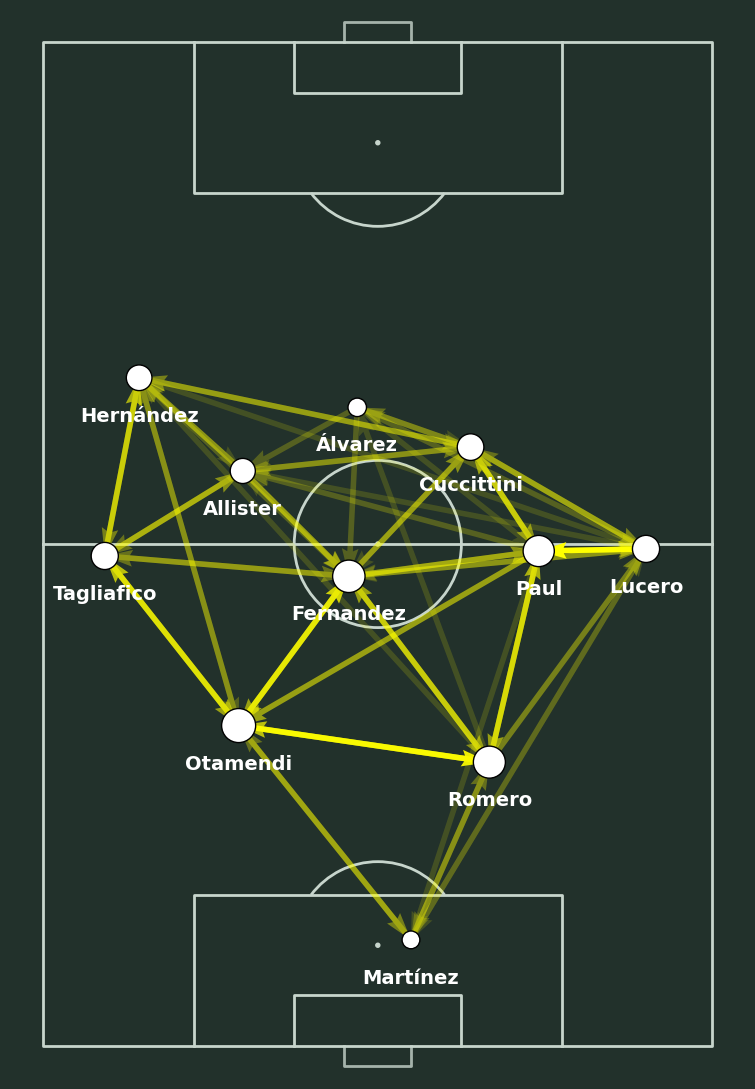

In [270]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', goal_type='box', goal_alpha=.8)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

arrows = pitch.arrows(pass_between.x, pass_between.y, pass_between.x_end, pass_between.y_end, ax=ax, color=color, zorder=.99)

nodes = pitch.scatter(averange_location.x, averange_location.y, ax=ax, color='white', ec='black', s=averange_location['marker_size'])

for index, row in pass_between[['pasador', 'x', 'y']].drop_duplicates(subset='pasador').iterrows():
    pitch.annotate(row.pasador.split(' ')[-1], xy=(row.x-4.5, row.y), c='white', va='center', ha='center', size=14, weight='bold', ax=ax,zorder=1)